In [1]:
# Here's the code for the necessary imports for a regression problem, along with their descriptions:

# Data Handling and Processing
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computing

# Data Visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns  # For drawing attractive and informative statistical graphics

pd.plotting.register_matplotlib_converters()
%matplotlib inline

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder  # For feature scaling and one-hot encoding
from sklearn.impute import SimpleImputer  # For handling missing data

# Feature Selection
from sklearn.feature_selection import RFE, SelectKBest, f_regression  # For feature selection

# Model Selection and Training
from sklearn.linear_model import LinearRegression, Ridge, Lasso  # For linear regression models and regularization
from sklearn.ensemble import RandomForestRegressor  # For random forest regression model
from sklearn.svm import SVR  # For support vector regression model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating regression models

# Model Tuning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # For data splitting, hyperparameter tuning, and cross-validation

# Miscellaneous
import warnings  # For controlling warnings
warnings.filterwarnings('ignore')  # For ignoring warnings

2024-01-09 22:19:59.010344: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Here's the code for the necessary imports for a classification problem, along with their descriptions:

# Data Handling and Processing
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computing

# Data Visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns  # For drawing attractive and informative statistical graphics

pd.plotting.register_matplotlib_converters()
%matplotlib inline

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder  # For feature scaling and encoding
from sklearn.impute import SimpleImputer  # For handling missing data

# Feature Selection
from sklearn.feature_selection import RFE, SelectKBest, chi2  # For feature selection

# Model Selection and Training
from sklearn.linear_model import LogisticRegression  # For logistic regression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # For random forest and gradient boosting classifiers
from sklearn.svm import SVC  # For Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier  # For K-Nearest Neighbors classifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score  # For evaluating classification models

# Model Tuning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # For data splitting, hyperparameter tuning, and cross-validation

# Miscellaneous
import warnings  # For controlling warnings
warnings.filterwarnings('ignore')  # For ignoring warnings

In [3]:
df = pd.read_csv('titanicclassification.csv',index_col='PassengerId')

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Sex's Distribution of the survivors

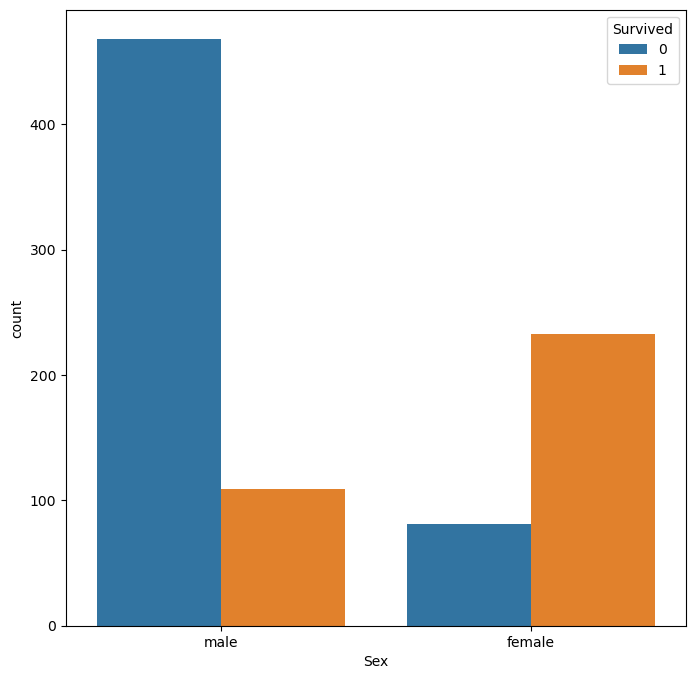

In [5]:
plt.figure(figsize=(8,8))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.show()

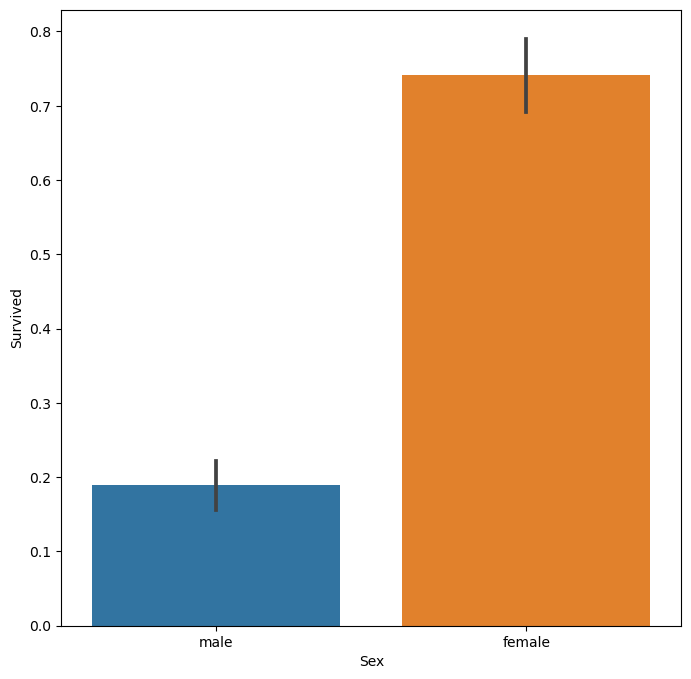

In [6]:
plt.figure(figsize=(8,8))
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

In [7]:
total_men = df[df['Sex'] == 'male'].shape[0]
total_women = df[df['Sex'] == 'female'].shape[0]
men_survived = df[(df['Survived'] == 1) & (df['Sex'] == 'male')].shape[0]
women_survived = df[(df['Survived'] == 1) & (df['Sex'] == 'female')].shape[0]
print('Percentage of Men that have survived: ', men_survived/total_men * 100)
print('Percentage of Men that have survived: ', women_survived/total_women * 100)

Percentage of Men that have survived:  18.890814558058924
Percentage of Men that have survived:  74.20382165605095


### Age's Distribution of the survivors

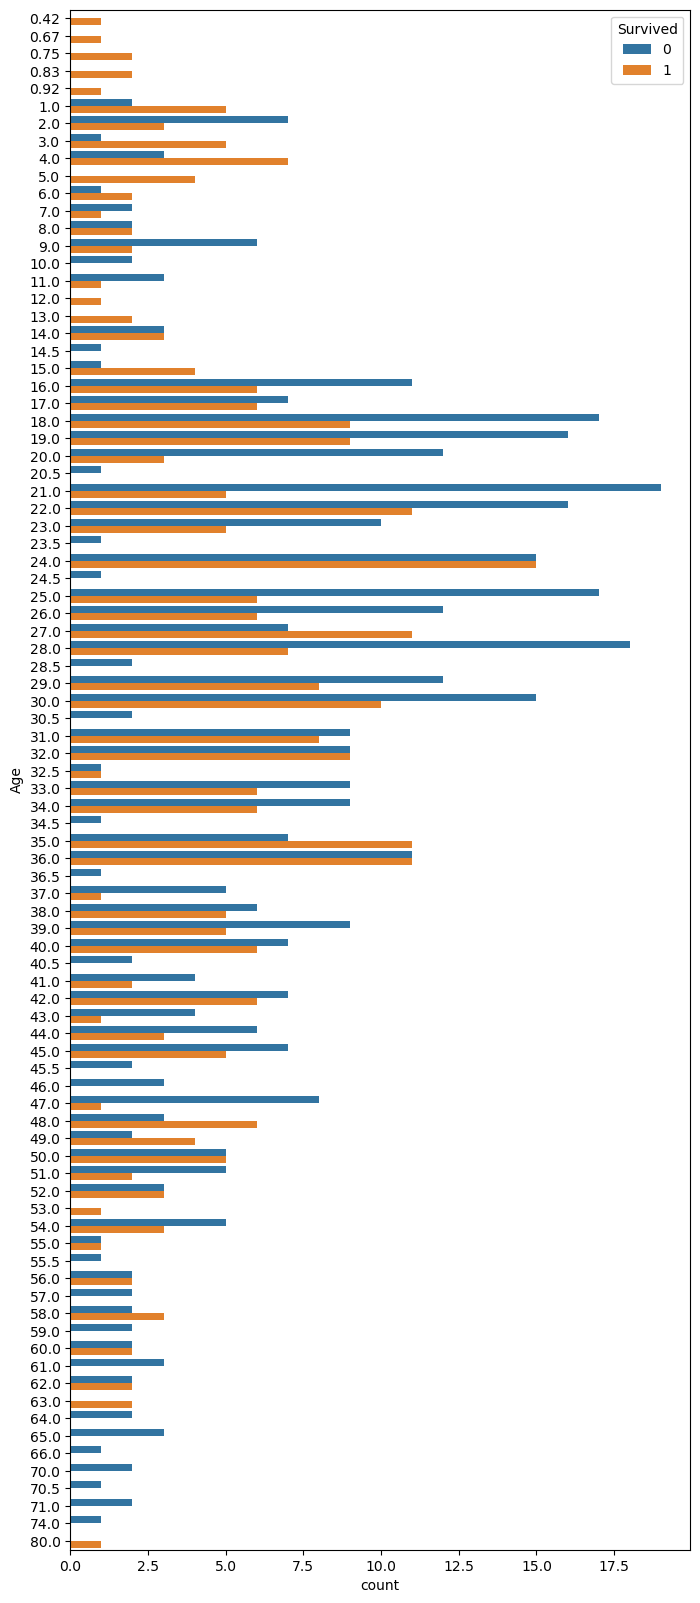

In [8]:
plt.figure(figsize=(8,20))
sns.countplot(y='Age', hue='Survived', data=df)
plt.show()

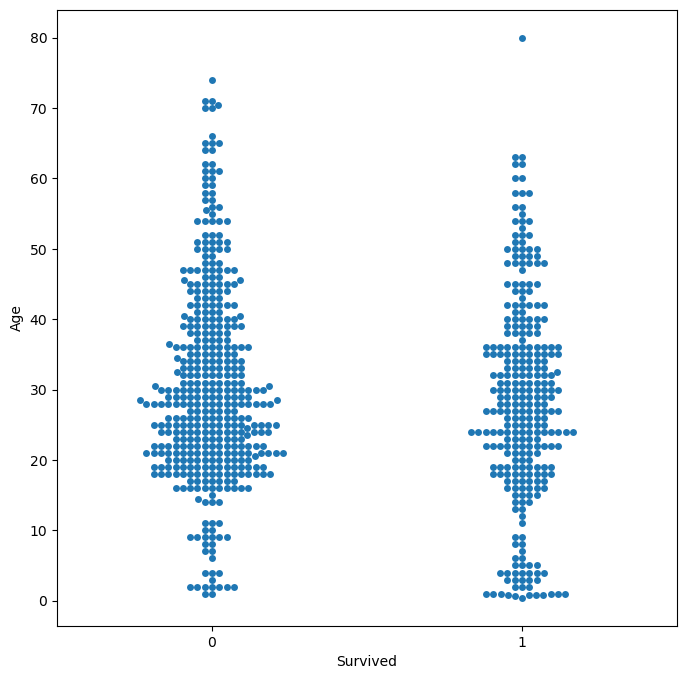

In [9]:
plt.figure(figsize=(8,8))
sns.swarmplot(x='Survived', y='Age', data=df)
plt.show()

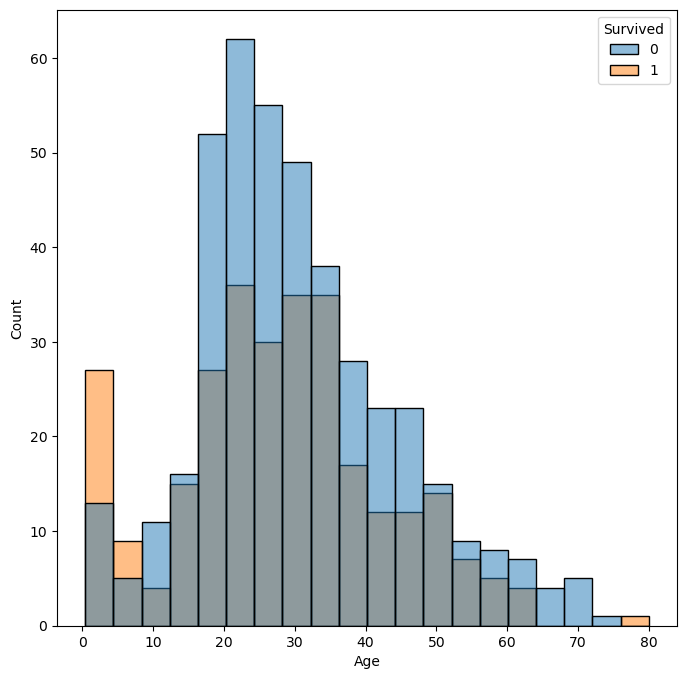

In [10]:
plt.figure(figsize=(8,8))
sns.histplot(x='Age', hue='Survived', data=df)
plt.show()

In [11]:
survivors_df = df[df['Survived'] == 1]
deads_df = df[df['Survived'] == 0]
print('Mean Age of the suvivors', survivors_df['Age'].mean())
print('Mean Age of the deads', deads_df['Age'].mean())

Mean Age of the suvivors 28.343689655172415
Mean Age of the deads 30.62617924528302


### Survivors by port Embarked

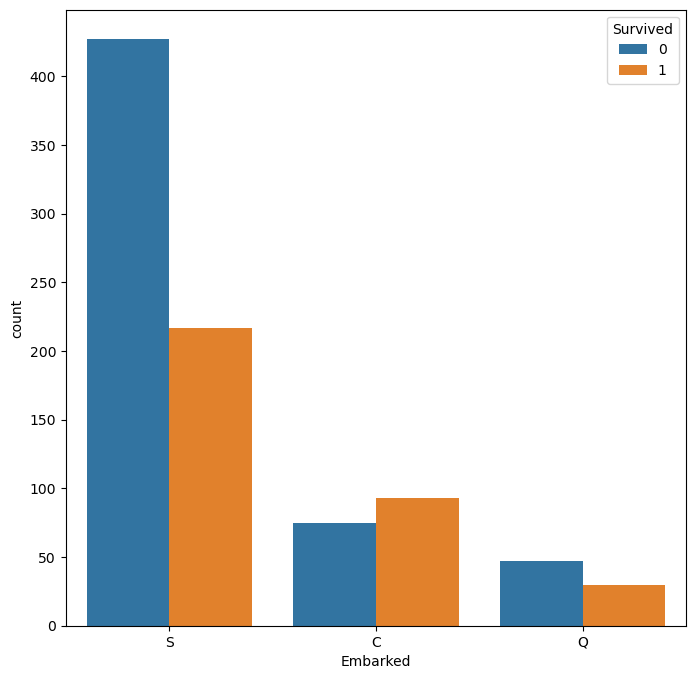

In [12]:
plt.figure(figsize=(8,8))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.show()

<Axes: xlabel='Embarked', ylabel='Survived'>

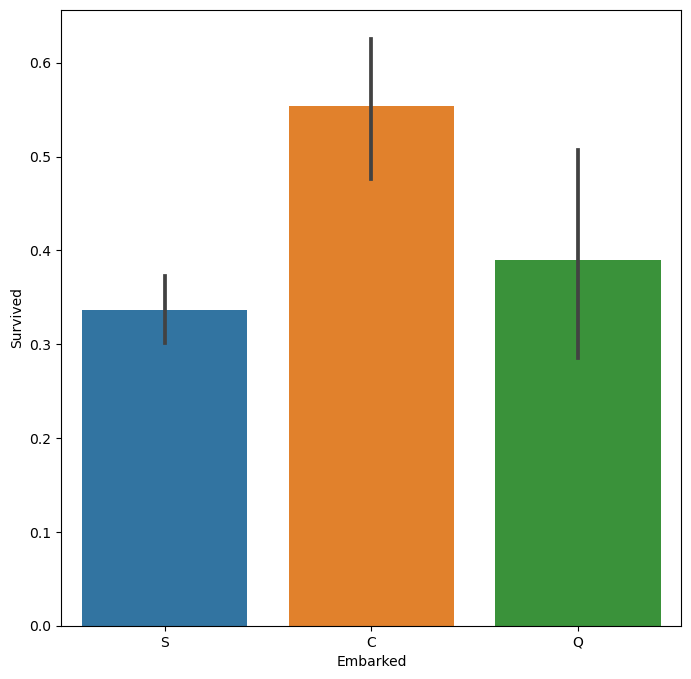

In [13]:
plt.figure(figsize=(8,8))
sns.barplot(x='Embarked', y='Survived', data = df)

#### After exploring and visualizing a bit the data, it seems that women and people whoe have Embarked at C are people which had the higher chance of surviving the tinanic crash.
#### We will now drop the irrelevant columns: 'Name', 'Cabin' and 'Ticket'

In [14]:
df_1 = df.drop(['Name', 'Cabin', 'Ticket'], axis=1)

In [15]:
df_1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


### Handling Missing Values

In [16]:
df_1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [17]:
df_1.dropna(subset=['Embarked'],inplace=True) # Dropping the embarked Nan values because we can't remplace it with a vlue
df_1['Age'].fillna(df_1['Age'].mean(), inplace=True) # Filling Nan Age by the mean

### Encoding categorical variables

In [18]:
df_1_encoded = pd.get_dummies(df_1, columns=['Sex', 'Embarked'], dtype=int)
df_1_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


### Checking correlation

<Axes: >

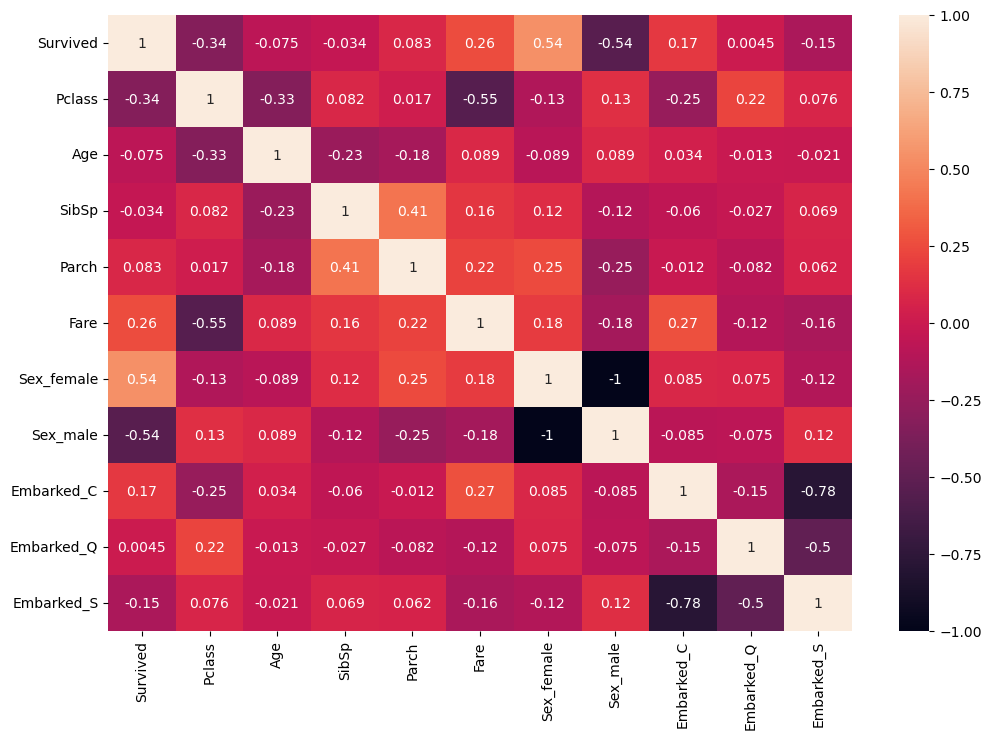

In [19]:
plt.figure(figsize=(12,8))
corr_matrix = df_1_encoded.corr()
sns.heatmap(corr_matrix, annot=True)

### Data Scaling

In [20]:
# Selecting features to scale
features = df_1_encoded[['Age', 'Fare']]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)
print(scaled_features)

df_1_encoded['Age'] = scaled_features[:, 0]  # First column of scaled data
df_1_encoded['Fare'] = scaled_features[:, 1]  # Second column of scaled data

[[-5.89619855e-01 -5.00239751e-01]
 [ 6.44847987e-01  7.88946608e-01]
 [-2.81002895e-01 -4.86649935e-01]
 ...
 [-5.48213849e-16 -1.74084157e-01]
 [-2.81002895e-01 -4.22126048e-02]
 [ 1.81922546e-01 -4.90173220e-01]]


In [21]:
df_1_encoded.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,-0.589620,1,0,-0.500240,0,1,0,0,1
2,1,1,0.644848,1,0,0.788947,1,0,1,0,0
3,1,3,-0.281003,0,0,-0.486650,1,0,0,0,1
4,1,1,0.413385,1,0,0.422861,1,0,0,0,1
5,0,3,0.413385,0,0,-0.484133,0,1,0,0,1


### Running different models

In [22]:
X = df_1_encoded.drop(columns = 'Survived', axis=1)
y = df_1_encoded['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((711, 10), (178, 10))

Logistic Regression

In [23]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.8089887640449438

Random Forest Classifier

In [24]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.7921348314606742

Gradient Boosting

In [32]:
model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1,max_depth=3)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.8426966292134831

In [33]:
# SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.7696629213483146

In [34]:
# Neural network architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu')) 
model.add(Dense(64, activation='relu'))  
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=10, validation_data=(X_test,y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/5
72/72 [==============================] - 1s 4ms/step - loss: 0.5294 - accuracy: 0.7454 - val_loss: 0.4734 - val_accuracy: 0.8202
Epoch 2/5
72/72 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.7961 - val_loss: 0.4516 - val_accuracy: 0.8202
Epoch 3/5
72/72 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8059 - val_loss: 0.4383 - val_accuracy: 0.8258
Epoch 4/5
72/72 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8129 - val_loss: 0.4470 - val_accuracy: 0.8258
Epoch 5/5
6/6 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.8315
Test Accuracy: 83.15%
